In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import glob


#Grabs all csv files from folder
#outputs wavelength and photon intensity array

folder_name = r'D:\spectroscopy\fergie spec\drop cast\ICG\12-16-2024\trial 3\raw data'
# Get a list of all CSV files in the folder
csv_files = glob.glob(folder_name+'/*.csv')

first_csv_file = pd.read_csv(csv_files[0],skiprows=1).to_numpy()
wavelengths = first_csv_file[:,-2]

x = int(np.shape(csv_files)[0])
y = int(np.shape(wavelengths)[0])

all_scan_data = np.zeros([y,x])
all_scan_data = np.column_stack((wavelengths,all_scan_data))

# Create an empty list to store the dataframes
dfs = []

i = 1

# Loop through the CSV files
for file in csv_files:
    # Read the CSV file into a dataframe
    df = pd.read_csv(file,skiprows=1).to_numpy()

    all_scan_data[:,i] = df[:,-1]
    i = i+1




In [2]:
#converts data to positive
all_scan_data = np.abs(all_scan_data)

#copy all_scan_data to clipboard for excel
clipboard_copy = pd.DataFrame(all_scan_data).to_clipboard()
#df.to_clipboard(index=False,header=False)

In [ ]:
######### example
# data = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]).T

# print(data[::3])


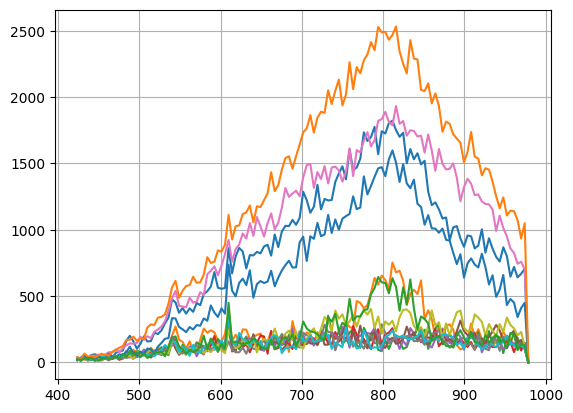

In [27]:
#########moving average


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


data = all_scan_data

window_size = 8


final_moving_avg = np.zeros([int(np.round((np.shape(data)[0]/window_size))),np.shape(data)[1]])


for i in range(len(data[0,:])):
    
    moving_avg = moving_average(data[:,i], window_size)
    #print(np.shape(moving_avg[::window_size]))
    #moving_avg[::window_size]
    
    final_moving_avg[:len(moving_avg[::window_size]),i] = moving_avg[::window_size]



i = 0

for i in range(1,int(np.shape(final_moving_avg)[1])):
    plt.plot(wavelengths[::window_size],final_moving_avg[:,i])

    #plt.scatter(wavelengths[::window_size],final_moving_avg[:,i])
    


#plt.legend(name_list)

plt.grid()
plt.show()


In [ ]:
i = 1

for i in range(1,int(np.shape(all_scan_data)[1])):
    #print(i)
    #print(np.shape(wavelengths))
    #print(np.shape(all_scan_data[:,i]))
    plt.scatter(wavelengths,all_scan_data[:,i])
    


#plt.legend(name_list)

plt.grid()
plt.show()